In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 2.6 MB/s eta 0:00:00


In [4]:
import praw
import csv

# Setting up Reddit credentials
reddit = praw.Reddit(
    client_id='fhkYWPMndRZCzICB7U54AQ',  # Your client ID
    client_secret='OSja_7O4OCynDVKY6zYh7wE_AK_m7A',  # Your client secret
    user_agent='scrapeScript by /u/Complex-Artichoke592',  # Your user agent
    username='Complex-Artichoke592',
    password='Harsh@123'
)

# Access the Memes_Of_The_Dank subreddit
subreddit = reddit.subreddit('Memes_Of_The_Dank')

# Open a CSV file for writing
with open('Meme_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Write the header row with additional description
    writer.writerow(['Title', 'Score', 'ID', 'URL', 'Text', 'Subreddit', 'Post Type'])

    # Search for posts with 'Trump'
    for submission in subreddit.search('Trump', limit=10):  # Limit to 10 results for now
        # Determine post type
        post_type = 'Self-post' if submission.is_self else 'Link/Media'

        # Write each submission's details to the CSV
        writer.writerow([
            submission.title,       # Title of the post
            submission.score,       # Score of the post
            submission.id,          # Unique ID of the post
            submission.url,         # URL of the post
            submission.selftext,    # Text content of the post (description for self-posts)
            submission.subreddit,   # Subreddit name
            post_type               # Type of the post (self-post or link/media)
        ])

print("Data has been written to 'Meme_data.csv'")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Data has been written to 'Meme_data.csv'


Clustering Coefficient for each node: {'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'J': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'O': 0.0, 'P': 0.0}
Average Clustering Coefficient of the network: 0.0


In [ ]:
import networkx as nx

# Create nodes and define edges
G = nx.Graph()
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P"]
edges = [
    ("A", "B"), ("A", "E"), ("A", "G"),
    ("B", "C"), ("B", "F"),
    ("C", "D"), ("C", "G"),
    ("D", "K"), ("D", "H"),
    ("E", "F"), ("E", "I"),
    ("F", "G"), ("F", "J"), ("F", "M"),
    ("G", "H"), ("G", "K"),
    ("H", "L"),
    ("I", "J"), ("I", "M"),
    ("J", "K"), ("J", "N"), ("J", "P"),
    ("K", "L"), ("K", "O"),
    ("L", "P"),
    ("M", "N"),
    ("N", "O"),
    ("O", "P")
]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Calculate the clustering coefficient of the entire network
clustering_coefficient_network = nx.average_clustering(G)

# Calculate and print each node's clustering coefficient
clustering_coefficients = nx.clustering(G)
for node, coeff in clustering_coefficients.items():
    print(f"Clustering Coefficient of node {node}: {coeff}")

# Display the result for the entire network
print("\nClustering Coefficient of the entire network:", clustering_coefficient_network)


Clustering Coefficient of node A: 0
Clustering Coefficient of node B: 0
Clustering Coefficient of node C: 0
Clustering Coefficient of node D: 0
Clustering Coefficient of node E: 0
Clustering Coefficient of node F: 0
Clustering Coefficient of node G: 0
Clustering Coefficient of node H: 0
Clustering Coefficient of node I: 0
Clustering Coefficient of node J: 0
Clustering Coefficient of node K: 0
Clustering Coefficient of node L: 0
Clustering Coefficient of node M: 0
Clustering Coefficient of node N: 0
Clustering Coefficient of node O: 0
Clustering Coefficient of node P: 0

Clustering Coefficient of the entire network: 0.0


In [ ]:
import networkx as nx
import itertools

# Create the original graph with nodes and edges
G = nx.Graph()
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P"]
edges = [
    ("A", "B"), ("A", "E"), ("A", "G"), ("A", "F"),
    ("B", "C"), ("B", "F"),
    ("C", "D"), ("C", "G"),
    ("D", "K"), ("D", "H"),
    ("E", "F"), ("E", "I"),
    ("F", "G"), ("F", "J"), ("F", "M"),
    ("G", "H"), ("G", "K"),
    ("H", "L"),
    ("I", "J"), ("I", "M"),
    ("J", "K"), ("J", "N"), ("J", "P"),
    ("K", "L"), ("K", "O"),
    ("L", "P"),
    ("M", "N"),
    ("N", "O"),
    ("O", "P")
]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Calculate initial clustering coefficient of the entire network
initial_clustering_coefficient = nx.average_clustering(G)
print("Initial Clustering Coefficient of the network:", initial_clustering_coefficient)

# Step 1: Find all possible pairs of nodes that are not currently connected
possible_edges = [
    (u, v) for u, v in itertools.combinations(G.nodes, 2) if not G.has_edge(u, v)
]

# Step 2: Find the best edge to add to maximize clustering coefficient
best_edge = None
highest_clustering_coefficient = initial_clustering_coefficient

for u, v in possible_edges:
    # Temporarily add the edge
    G.add_edge(u, v)

    # Calculate the new clustering coefficient
    new_clustering_coefficient = nx.average_clustering(G)

    # Check if this is the highest clustering coefficient found
    if new_clustering_coefficient > highest_clustering_coefficient:
        highest_clustering_coefficient = new_clustering_coefficient
        best_edge = (u, v)

    # Remove the edge to restore the original graph
    G.remove_edge(u, v)

# Output the best edge and the new clustering coefficient
print("Best edge to add:", best_edge)
print("New Clustering Coefficient of the network after adding the best edge:", highest_clustering_coefficient)


Initial Clustering Coefficient of the network: 0.09166666666666666
Best edge to add: ('J', 'O')
New Clustering Coefficient of the network after adding the best edge: 0.18333333333333335


In [ ]:
import networkx as nx

# Define the nodes and edges as provided
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P"]
edges = [
    ("A", "B"), ("A", "E"), ("A", "G"), ("A", "F"),
    ("B", "C"), ("B", "F"),
    ("C", "D"), ("C", "G"),
    ("D", "K"), ("D", "H"),
    ("E", "F"), ("E", "I"),
    ("F", "G"), ("F", "J"), ("F", "M"),
    ("G", "H"), ("G", "K"),
    ("H", "L"),
    ("I", "J"), ("I", "M"),
    ("J", "K"), ("J", "N"), ("J", "P"),
    ("K", "L"), ("K", "O"),
    ("L", "P"),
    ("M", "N"),
    ("N", "O"),
    ("O", "P")
]

# Step 1: Create the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Step 2: Calculate the clustering coefficient for a specific node, e.g., "A"
clustering_coefficient_A = nx.clustering(G, "A")
print("Clustering coefficient for node A:", clustering_coefficient_A)

# Step 3: Calculate the average clustering coefficient for the entire network
average_clustering_coefficient = nx.average_clustering(G)
print("Average clustering coefficient of the network:", average_clustering_coefficient)


Clustering coefficient for node A: 0.5
Average clustering coefficient of the network: 0.09166666666666666


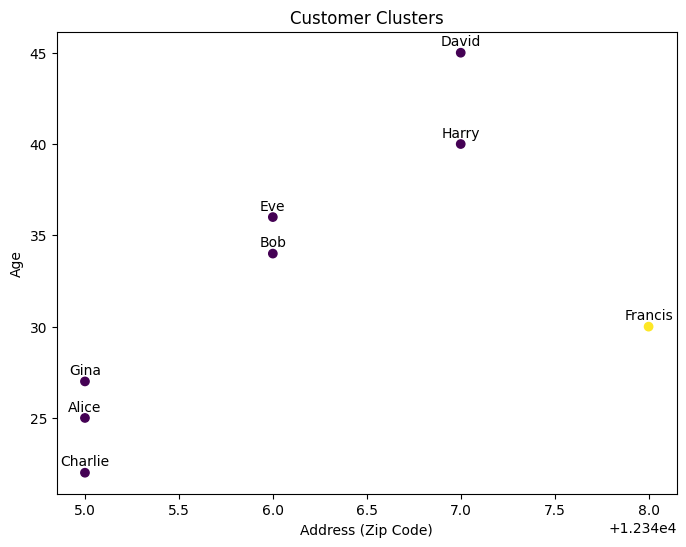

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample data: Name, Address, Age
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Address': ['12345', '12346', '12345', '12347', '12346'],  # Zip codes
    'Age': [25, 34, 22, 45, 36]
}
df = pd.DataFrame(data)

# Add new customers to the DataFrame
new_customers = pd.DataFrame({
    'Name': ['Francis', 'Gina', 'Harry'],
    'Address': ['12348', '12345', '12347'],
    'Age': [30, 27, 40]
})
df = pd.concat([df, new_customers], ignore_index=True)

# Preprocessing
df['Address'] = df['Address'].astype(int)
X = df[['Address', 'Age']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Generate a graph
plt.figure(figsize=(8, 6))
plt.scatter(df['Address'], df['Age'], c=df['Cluster'], cmap='viridis')
for i, row in df.iterrows():
    plt.annotate(row['Name'], (row['Address'], row['Age']), textcoords="offset points", xytext=(0, 5), ha='center')
plt.xlabel('Address (Zip Code)')
plt.ylabel('Age')
plt.title('Customer Clusters')
plt.show()

Object `where` not found.
